# Exponential Mid-Point Method

This notebook implements a **mid-point exponential integrator** to simulate the motion of a particle under a central gravitational force while interacting with a background gas. The integrator combines elements of the **leapfrog method** (kick-drift-kick scheme) with an **exponential decay term** to model drag or stopping forces.  This is the Kick-Drift-Kick equations of a leap-frog Exponential Mid-Point Method of integration: 

$$\left[ {\begin{array}{c}
   x^{n+\frac{1}{2}}  \\
   y^{n+\frac{1}{2}}  \\
   z^{n+\frac{1}{2}}  \\
  \end{array} } \right] = \left[ {\begin{array}{c}
   x^{n}  \\
   y^{n}  \\
   z^{n}  \\
  \end{array} } \right] + \Delta t \left[ {\begin{array}{c}
   v^{n}_x  \\
   v^{n}_y  \\
   v^{n}_z  \\
  \end{array} } \right] \tag{1}$$

$$\left[ {\begin{array}{c}
   v^{n+1}_x \\
   v^{n+1}_y \\
   v^{n+1}_z  \\
  \end{array} } \right] = \left[ {\begin{array}{c}
   v^{n+1}_{x_{gas}} \\
   v^{n+1}_{y_{gas}} \\
   v^{n+1}_{z_{gas}}  \\
  \end{array} } \right] + \left[ {\begin{array}{c}
   v^{n}_x - v^{n}_{x_{gas}} \\
   v^{n}_y -  v^{n}_{y_{gas}} \\
   v^{n}_z -  v^{n}_{z_{gas}} \\
  \end{array} } \right] e^{-\Delta t / t_{stop}} + t_{stop}(1 - e^{-\Delta t / t_{stop}})  \left[ {\begin{array}{c}
   \frac{GMx^{n+\frac{1}{2}}}{r^3} \\
   \frac{GMy^{n+\frac{1}{2}}}{r^3} \\
   \frac{GMz^{n+\frac{1}{2}}}{r^3} \\
  \end{array} } \right] \tag{2}$$

$$\left[ {\begin{array}{c}
   x^{n+1}  \\
   y^{n+1}  \\
   z^{n+1}  \\
  \end{array} } \right] = \left[ {\begin{array}{c}
   x^{n+\frac{1}{2}} \\
 y^{n+\frac{1}{2}} \\
 z^{n+\frac{1}{2}}  \\
  \end{array} } \right] + \Delta t \left[ {\begin{array}{c}
   v^{n+1}_x  \\
   v^{n+1}_y  \\
   v^{n+1}_z  \\
  \end{array} } \right] \tag{3}$$

Key features of the simulation include:  
- Time evolution of particle position and velocity using the mid-point integration method.  
- Incorporation of stochastic gas velocities to model interactions with a surrounding medium.  
- Exponential damping to represent the stopping time of the particle due to drag.  
- Gravitational acceleration from a central mass \(M\) with Newtonian gravity.  

**Implementation Highlights:**  
1. **Half-step position update** (kick) to compute mid-point positions.  
2. **Velocity update** with both exponential drag and gravitational acceleration.  
3. **Full-step position update** using updated velocities (drift).  
4. Time array keeps track of the simulation timeline.  

This integrator is particularly useful for **stiff systems** where simple explicit methods would require very small time steps for stability. The method provides a good balance between stability and computational efficiency, making it suitable for simulating particle-gas interactions and orbital dynamics.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Generating the Simulation time scales
dt = 0.1
t_max = 100
n_steps = int(t_max/dt)

#Generating the Particle Speed and Distance
v_x = np.zeros(n_steps)
v_y = np.zeros(n_steps)
v_z = np.zeros(n_steps)

x = np.zeros(n_steps)
y = np.zeros(n_steps)
z = np.zeros(n_steps)

time = np.zeros(n_steps)

#Starting Conditions of the Particle
v_x[0] = 156 #Intial Velocity
v_y[0] = 29 #Intial Velocity
v_z[0] = 3 #Intial Velocity

x[0] = 76  #Starting position
y[0] = 5  #Starting position
z[0] = 35  #Starting position

#Describing Random Gas Velocities
vgx = np.random.random(n_steps) #Gas Velocity x
vgy = np.random.random(n_steps) #Gas Velocity y
vgz = np.random.random(n_steps) #Gas Velocity z


#Simulation constant
t_stop = 10 #Stopping Time
M = 2       #Mass of central Object
G = 1

In [3]:
#Leap Frog Loop
for i in range(1,n_steps):
    
#Half increment in position (kick):
    x_half = x[i-1] + dt*v_x[i-1]
    y_half = y[i-1] + dt*v_y[i-1]
    z_half = z[i-1] + dt*v_z[i-1]

#Full Increment in velocity (drift):
    radius = np.sqrt(x_half**2 + y_half**2 + z_half**2)
    a_x_new = -(G*M*x_half)/radius**3
    a_y_new = -(G*M*y_half)/radius**3
    a_z_new = -(G*M*z_half)/radius**3
    
    v_x[i] = vgx[i] + (v_x[i - 1] + vgx[i - 1]) * np.exp(-dt / t_stop) + t_stop*(1 - np.exp(-dt/t_stop)) * a_x_new
    v_y[i] = vgy[i] + (v_y[i - 1] + vgy[i - 1]) * np.exp(-dt / t_stop) + t_stop*(1 - np.exp(-dt/t_stop)) * a_y_new
    v_z[i] = vgz[i] + (v_z[i - 1] + vgz[i - 1]) * np.exp(-dt / t_stop) + t_stop*(1 - np.exp(-dt/t_stop)) * a_z_new
    
#Full increment in position (kick):
    x[i] = x_half + dt*v_x[i]
    y[i] = y_half + dt*v_y[i]
    z[i] = z_half + dt*v_z[i]

#Time keeping
    time[i] = i*dt

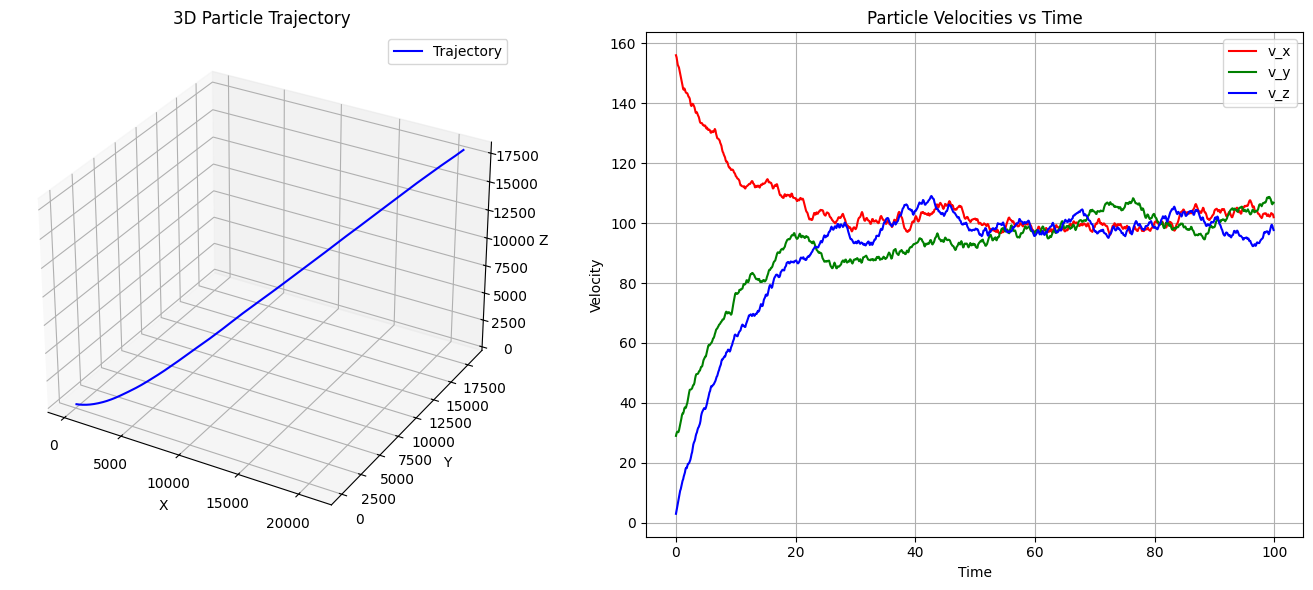

In [4]:
fig = plt.figure(figsize=(14,6))

# Left subplot: 3D trajectory
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot(x, y, z, label='Trajectory', color='blue')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.set_title('3D Particle Trajectory')
ax1.legend()

# Right subplot: velocities vs time
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(time, v_x, label='v_x', color='red')
ax2.plot(time, v_y, label='v_y', color='green')
ax2.plot(time, v_z, label='v_z', color='blue')
ax2.set_xlabel('Time')
ax2.set_ylabel('Velocity')
ax2.set_title('Particle Velocities vs Time')
ax2.legend()
ax2.grid(True)

# Show the combined figure
plt.tight_layout()
plt.show()